<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW10/AutoEncoders_OnFaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import glob
import h5py
from PIL import Image
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
cd /content/gdrive/Shareddrives/DSPS2021

/content/gdrive/Shareddrives/DSPS2021


In [7]:
!ls

10802534_761689917241346_821292660_n.jpg  galaxies.npy
ak0.png					  higgsb
ak1.png					  images_test_rev1.zip
ak2.png					  images_training_rev1
ak3.png					  images_training_rev1.zip
ak4.png					  kaggleTitanic
all_ones_benchmark.zip			  nyzipcodes
all_zeros_benchmark.zip			  training_solutions_rev1.csv
central_pixel_benchmark.zip		  training_solutions_rev1.zip
data					  uo_img.jpg


# Read the data

In [48]:
flist = glob.glob("data/faces95/*jpg")
N = len(flist)
print(N)

1440


((70, 70, 1), 540)

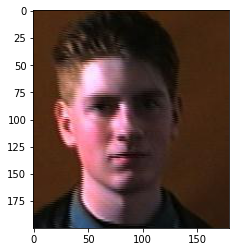

In [78]:
im = Image.open(flist[40])
np_im = np.array(im)[:,:,:3].astype(float) / 255 #normalize the images so that they are 0-1
pl.imshow(np_im)
# I am going to need only a subset of the image: the center part where the head is

np_im[25:165:2,25:165:2,:1].shape, np.prod(np_im.shape[1:])

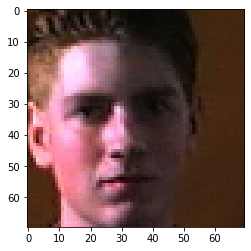

In [50]:
pl.imshow(np_im[25:165:2,25:165:2])

In [85]:
#skip and read the saved version if you have saved it (after the first time you run this cell)
# I also use a single color channel (black and white)
imgs = np.zeros((N, 70, 70, 1))
for i,f in enumerate(flist):
  if not i%50: print(i)
  im = Image.open(flist[i])
  np_im = np.array(im)[:,:,:3].astype(float) / 255 
  # here I collect the certain portion of each image 
  # from pixel 25 to 165 on the x and y axis (25:165)
  # and subsampling by a factor 2 (25:165:2)
  # and I am only choosing 1 color layer: [...,:1]: the R in RGB layers
  imgs[i] = np.array(im)[25:165:2,25:165:2,:1].astype(float) / 255 
#uncomment this to save another array of images - I saved the original one as data/faces.npy


0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400


In [86]:
# I just saved it to my own directroy
np.save("/content/gdrive/MyDrive/machine_learning_course/autoencoders/faces_saved.npy", imgs)

In [87]:
imgs = np.load("data/faces.npy")
imgs.shape

(1440, 70, 70, 1)

# Change Resolution of data for fast processing

In [88]:
#imgs orig is the full resolution image
imgs_orig = imgs.copy()

In [89]:
imgs.shape

(1440, 70, 70, 1)

In [106]:
# lower the resolution
# example: take one every N pixels
imgs_lr = imgs[:,::2,::2]
# slightly better than the line of code above
#imgs_lr = imgs.reshape(...).mean(...).mean(...)
imgs_lr.shape

(1440, 35, 35, 1)

In [107]:
np.prod(imgs_lr[1].shape), np.prod(imgs[1].shape), 

(1225, 4900)

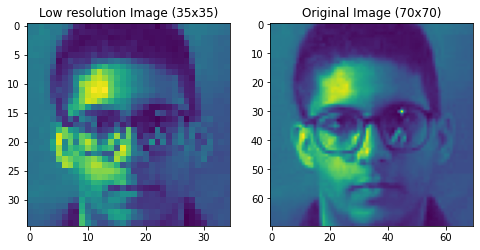

In [116]:
fig,axes = plt.subplots(1,2, figsize=(8,4))
axes[0].imshow(imgs_lr[55].reshape(35,35))
axes[0].set_title("Low resolution Image (35x35)")
axes[1].imshow(imgs[55].reshape(70,70))
axes[1].set_title("Original Image (70x70)");

## Creating Training and Test data sets

In [118]:
X_tr,  X_te, y_tr, y_te = train_test_split(imgs_lr, imgs, test_size=0.30, random_state=5)

In [120]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((1008, 35, 35, 1), (432, 35, 35, 1), (1008, 70, 70, 1), (432, 70, 70, 1))

In [121]:
#each image needs to be unravel into a flat array
X_tr = X_tr.reshape(len(X_tr), np.prod(X_tr.shape[1:]))
X_te = X_te.reshape(len(X_te), np.prod(X_te.shape[1:]))
y_tr = y_tr.reshape(len(y_tr), np.prod(y_tr.shape[1:]))
y_te = y_te.reshape(len(y_te), np.prod(y_te.shape[1:]))

In [122]:
## important: we feed to the NN rows of pixels, not cubes of pixels
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((1008, 1225), (432, 1225), (1008, 4900), (432, 4900))